# Analisis Traffic Pada Suatu Web

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

## Membaca dan Memahami Data

In [9]:
# Baca dataset
data = pd.read_csv('web_traffic.csv')

# Tampilkan beberapa baris pertama dataset
print(data.head())

             Timestamp  TrafficCount
0  2020-01-20 00:00:00         487.0
1  2020-01-20 00:30:00         385.0
2  2020-01-20 01:30:00         269.0
3  2020-01-20 02:30:00         517.0
4  2020-01-20 03:30:00         129.0


In [10]:
# Tampilkan informasi dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     2793 non-null   object 
 1   TrafficCount  2793 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.8+ KB
None


## Pra-pemrosesan Data

In [13]:
# Ubah kolom tanggal menjadi tipe datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Tampilkan beberapa baris pertama setelah konversi
print(data.head())

            Timestamp  TrafficCount
0 2020-01-20 00:00:00         487.0
1 2020-01-20 00:30:00         385.0
2 2020-01-20 01:30:00         269.0
3 2020-01-20 02:30:00         517.0
4 2020-01-20 03:30:00         129.0


In [14]:
# Periksa apakah ada nilai yang hilang
print(data.isnull().sum())

# Isi nilai yang hilang dengan interpolasi
data = data.interpolate()

Timestamp       0
TrafficCount    0
dtype: int64


## Eksplorasi Data

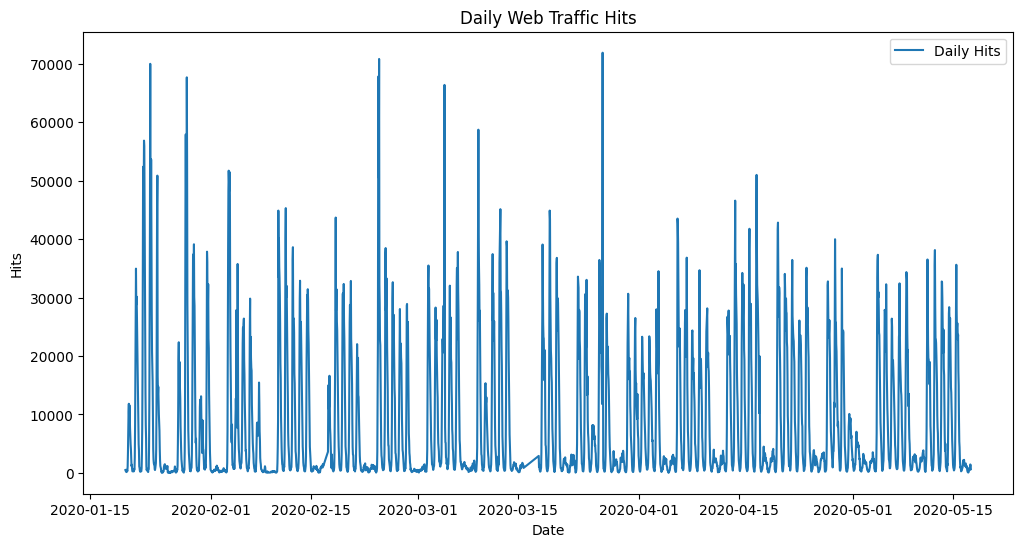

In [17]:
# Plot jumlah kunjungan harian
plt.figure(figsize=(12,6))
plt.plot(data['Timestamp'], data['TrafficCount'], label='Daily Hits')
plt.xlabel('Date')
plt.ylabel('Hits')
plt.title('Daily Web Traffic Hits')
plt.legend()
plt.show()

## Modeling dengan Poisson Regression

In [21]:
# Tambahkan fitur hari dalam minggu
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek

# Pisahkan fitur dan target
X = data[['DayOfWeek']]
y = data['TrafficCount']

# Tambahkan intercept untuk model Poisson Regression
X = sm.add_constant(X)

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Poisson Regression
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Tampilkan ringkasan model
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           TrafficCount   No. Observations:                 2234
Model:                            GLM   Df Residuals:                     2232
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2492e+07
Date:                Sat, 22 Jun 2024   Deviance:                   2.4963e+07
Time:                        06:15:53   Pearson chi2:                 2.96e+07
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6772      0.000   2.83e+04      0.0

Model Poisson Regression telah berhasil dibangun dengan fitur DayOfWeek yang mewakili hari dalam minggu. Ringkasan model menunjukkan bahwa koefisien untuk masing-masing hari dalam minggu telah dihitung, dan intercept model juga telah ditentukan.

## Evaluasi Model

In [22]:
# Prediksi menggunakan data testing
y_pred = poisson_model.predict(X_test)

# Hitung metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Root Mean Squared Error (RMSE): 10569.165428714428
Mean Absolute Error (MAE): 8033.331813832288


Metrik ini memberikan gambaran tentang seberapa baik model memprediksi jumlah kunjungan web. Nilai RMSE dan MAE yang lebih rendah menunjukkan prediksi yang lebih akurat.

## Visualisasi Hasil

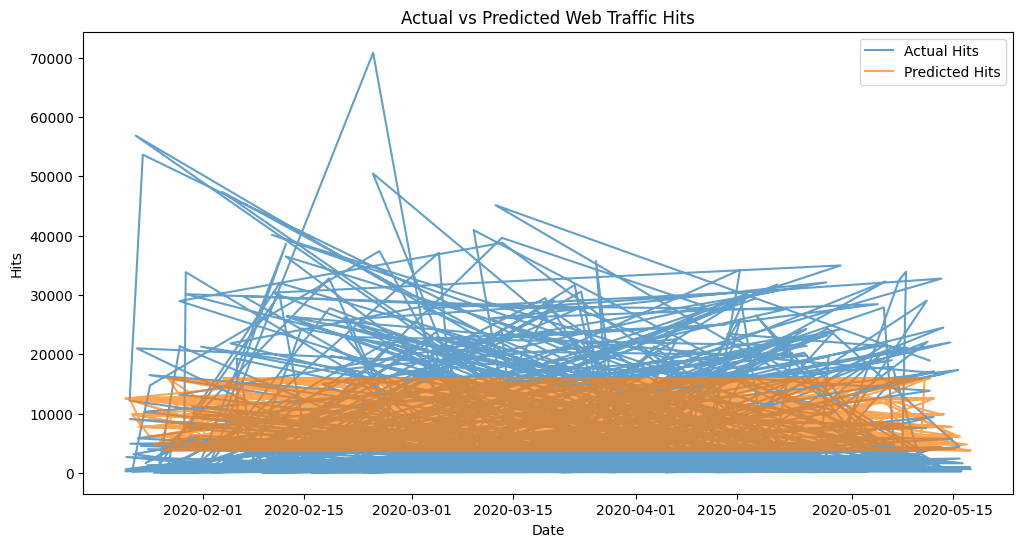

In [24]:
# Plot prediksi vs aktual
plt.figure(figsize=(12,6))
plt.plot(data['Timestamp'].iloc[X_test.index], y_test, label='Actual Hits', alpha=0.7)
plt.plot(data['Timestamp'].iloc[X_test.index], y_pred, label='Predicted Hits', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Hits')
plt.title('Actual vs Predicted Web Traffic Hits')
plt.legend()
plt.show()

Grafik prediksi versus aktual menunjukkan bagaimana prediksi model dibandingkan dengan data aktual. Jika grafik menunjukkan bahwa prediksi model mendekati data aktual, itu berarti model memiliki performa yang baik dalam memprediksi jumlah kunjungan web berdasarkan fitur DayOfWeek.